[GitHub Python Bar Review](https://github.com/ckorikov/python-bar-review)

# Контейнеры 2

## 1. Numpy: компактные массивы + готовые алгоритмы

**Numpy** — библиотека для научных вычислений, которая предоставляет эффективные массивы. Массивы в numpy называтют `ndarray` (от N-dimensional array).

`ndarray` состоят из трёх частей:
- плотно упакованной последовательности данных одного типа, которую называют *data buffer*,
- метаданных, которые описывают тип данных массива,
- и метаданных, которые описывают форму массива.

![title](img/numpy.png)

### Простейшие операции
Ниже показаны простейшие операции с numpy-массивом: 
- создание массива,
- вставка в конец, 
- извлечение по интексу,
- взятие подмассива, 
- чтение атрибутов.

In [2]:
# Импорт numpy
import numpy as np

In [3]:
# Пример 1D-массива
x = np.array([1, 2, 3], np.int32) # Создаем массив

x = np.append(x, np.int32(4)) # Добавить в конец массива

(type(x),
 x.shape, # форма массива
 x.dtype, # тип элемента
 x[2],    # извлечь элемент по индексу
 x[:2]    # slice (подмассив)
)

(numpy.ndarray, (4,), dtype('int32'), 3, array([1, 2], dtype=int32))

Массивы в numpy производительней списков.

In [4]:
# Списки vs Numpy: список
%timeit a = [i**2 for i in range(1000)]

329 µs ± 65.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
# Списки vs Numpy: numpy-массив
%timeit b = np.arange(1000)**2

3.57 µs ± 492 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Хранилище данных `ndarray` — непрерывная последовательность байт. К ней можно получить прямой доступ.

In [6]:
# Хранилище данных в массиве numpy
type(x.data), x.data

(memoryview, <memory at 0x7f3d1ca387a0>)

**NB!** `memoryview` — специальный встроенный тип в Python, который даёт эффеткинвый доступ к памяти объектов. Если необыходимо выделить участок подпамяти, то это происходит без копирования.

In [7]:
# Атрибуты массива в numpy
x.__array_interface__, x.flags

({'data': (94668433708880, False),
  'strides': None,
  'descr': [('', '<i4')],
  'typestr': '<i4',
  'shape': (4,),
  'version': 3},
   C_CONTIGUOUS : True
   F_CONTIGUOUS : True
   OWNDATA : True
   WRITEABLE : True
   ALIGNED : True
   WRITEBACKIFCOPY : False
   UPDATEIFCOPY : False)

Для каких-то экзотических случаев может быть полезно использовать внешний data buffer.

In [8]:
# Numpy-массив на внешнем data buffer
s = b"Hello"
y=np.frombuffer(s, dtype=np.int8)
y, id(s), y.__array_interface__["data"][0]

(array([ 72, 101, 108, 108, 111], dtype=int8),
 139900446700384,
 139900446700416)

Обратите внимание на адрес байтовой строки (`id` в CPython) и адрес data buffer.

### Индексирование

**Страйд** (англ. stride) — шаг, с которым извлекаются элементы массива.

In [9]:
# Схема индексирования
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]
             ],
             np.int32)
x.strides # вернёт (3*4, 4), где 4 — длина одного элемента в байтах

(12, 4)

Некоторые модификации массивов numpy сводятся к изменению страйдов.

In [10]:
# Реврс массива numpy — изменние страйда
x = np.array([1,2,3], np.int8)
x.strides, x[::-1].strides

((1,), (-1,))

In [11]:
# Изменение формы массива numpy — изменние страйда
x = np.array([[1,2,3],
              [4,5,6],
             ],
             np.int8)
x.strides, x.reshape(6,1), x.reshape(6,1).strides

((3, 1), array([[1],
        [2],
        [3],
        [4],
        [5],
        [6]], dtype=int8), (1, 1))

In [12]:
# Индексация по маске
x = np.array([1,2,3], np.int8)
x[[False, True, False]]

array([2], dtype=int8)

In [13]:
# Индексация по по маске, заданной функцией
x = np.arange(1, 10)
x[x%2==0]

array([2, 4, 6, 8])

In [14]:
# Индексация по списку индексов
x = np.array([1,2,3], np.int8)
x[[1,2]]

array([2, 3], dtype=int8)

### Некоторые функции над массивами numpy

In [15]:
# Полэлементное произведение матриц и матричное произведение (dot)
a = np.array([[1,2],[3,4]])
b = np.array([[1,0],[0,1]])

print(a*b , a.dot(b), sep='\n\n')

[[1 0]
 [0 4]]

[[1 2]
 [3 4]]


In [16]:
# Сумма, среднее, максимальное значение, индекс максимального значения массива
x = np.random.rand(10)
(
    x,
    x.sum(),
    x.mean(),
    x.max(),
    x.argmax()
)

(array([0.38241318, 0.98517829, 0.29464019, 0.83196427, 0.42219291,
        0.38410966, 0.25871797, 0.34078107, 0.77728931, 0.23494816]),
 4.912235024436345,
 0.49122350244363455,
 0.98517828787948,
 1)

In [17]:
# Broadcasting — если размеры массивов не совпадают, то операции размножаются
a = np.array([[1,2],[3,4]])
b = np.array([[0,1]])
a+b

array([[1, 3],
       [3, 5]])

/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


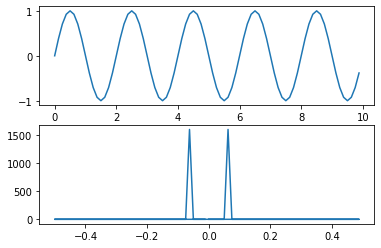

In [18]:
# Пример FFT с numpy-массивом 
import matplotlib.pyplot as plt

w = 2*0.5*np.pi
time = np.arange(0,10,0.125)
sigl = np.sin(w*time)
spct = np.fft.fft(sigl)
freq = np.fft.fftfreq(time.shape[-1])
plt.subplot(2, 1, 1)
plt.plot(time, sigl) # Сигнал
plt.subplot(2, 1, 2)
plt.plot(freq, spct * np.conjugate(spct)) # Спектр

### Почитать

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)

## 2. Pands: таблицы

**Pandas** — библиотека для анализа данных, надстройка над *numpy*. Основные структуры данных в Pandas — `Series` (1D) и `DataFrame` (2D).

In [19]:
# Импорт Pandas
import pandas as pd

### Series — последовальность однотипных данных

In [20]:
# Series в Pandas
pd.Series([1, 3, 5, np.nan, 6, 8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Pandas умеет обрабатывать пропуски в данных (NaN).

### DataFrame: таблица

DataFrame — это набор series. 

In [21]:
# DataFrame в Pandas
pd.DataFrame({'one': pd.Series([1., 2., 3.]),
              'two': pd.Series([1., 2., 3., 4.])})

,one,two
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
3,NaN,4.0


### Анализ внешнего датасета

Ниже приведен пример некоторых шагов анализа внешнего датасета. Для примера использован [датасет с чаевыми](https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset). 

In [22]:
# Загрузка датасета в pandas
dataset = pd.read_csv("https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv")
dataset.head() # Показать первые несколько строк датасета

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


В DataFrame можно добавить новые колонки.

In [23]:
# Новая колонка — чаевые как процент от суммы чека 
dataset["tip%"]=dataset["tip"]/dataset["total_bill"]*100

Простейший анализ — [описательная статистика](https://ru.wikipedia.org/wiki/Описательная_статистика). Описательная статистика применима к числовым данным.

In [24]:
# Описательная статистика для числовых колонок
dataset.describe()

,total_bill,tip,size,tip%
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


In [25]:
# Сложный запрос в Pandas
dataset.groupby(by="sex")[["tip%"]].mean()

,tip%
sex,
Female,16.649074
Male,15.765055


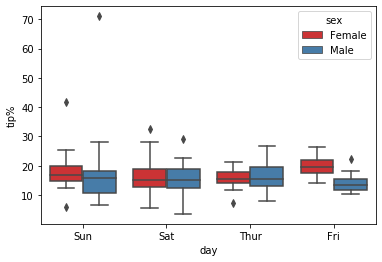

In [26]:
# Простейшая визуализация данных с Seaborn: boxplot по дням недели и полу
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="day", y="tip%", hue="sex", data=dataset, palette="Set1")

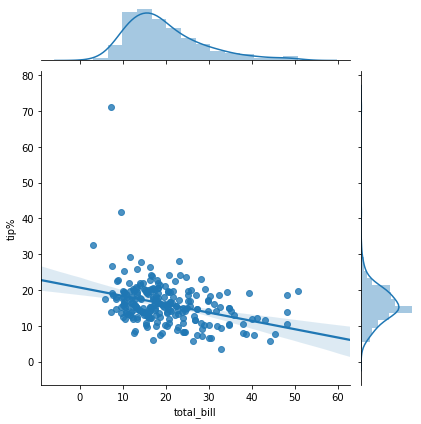

In [27]:
# Визуализация данных с Seaborn: scatterplot + линейная регрессия + гистограммы
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x="total_bill", y="tip%", data=dataset, kind="reg")

### Почитать

[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

In [28]:
%load_ext watermark
%watermark -d -u -v -iv

seaborn    0.9.0
pandas     0.25.1
matplotlib 3.1.1
numpy      1.17.1
last updated: 2019-08-30 

CPython 3.7.4
IPython 7.8.0
